In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [12]:
df_regl = regl_Apr27()#.sample(1000).reset_index(drop=True)
gdf = yp.GenomicDataFrame(df_regl)

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


13054 of 42245 sites with CV values via promoter annotation
26764 of 42245 sites with CV values via "associated gene"
gdf: pos_column unspecified, reverting to mean(start, end)


In [20]:
l_bid = [
    'HS333_crb55_JA26', 'HS322_crb55_EMB-JA33',
    'HS333_crb55_RC22', 'HS569_ATAC_RC23_cfp1_a', 'HS569_ATAC_RC23_cfp1_b',
    'HS097_Caro-I', 'HS097_Caro-K',
]

for bid in l_bid:
    step_ = 'tg_pe.bwa_pe.rm_unmapped_pe.rm_chrM.rm_blacklist.rm_q10.macs2_pe_lt200'
    fp_ = pf(bid, step_, '_treat_pileup.bw', 'atac_cfp1')
    print(os.path.isfile(fp_), bid)
    gdf.add_track(bid, fp_, flank_len=1000, bin_size=5, memoized=False)

True HS333_crb55_JA26
True HS322_crb55_EMB-JA33
True HS333_crb55_RC22
True HS569_ATAC_RC23_cfp1_a
True HS569_ATAC_RC23_cfp1_b
True HS097_Caro-I
True HS097_Caro-K


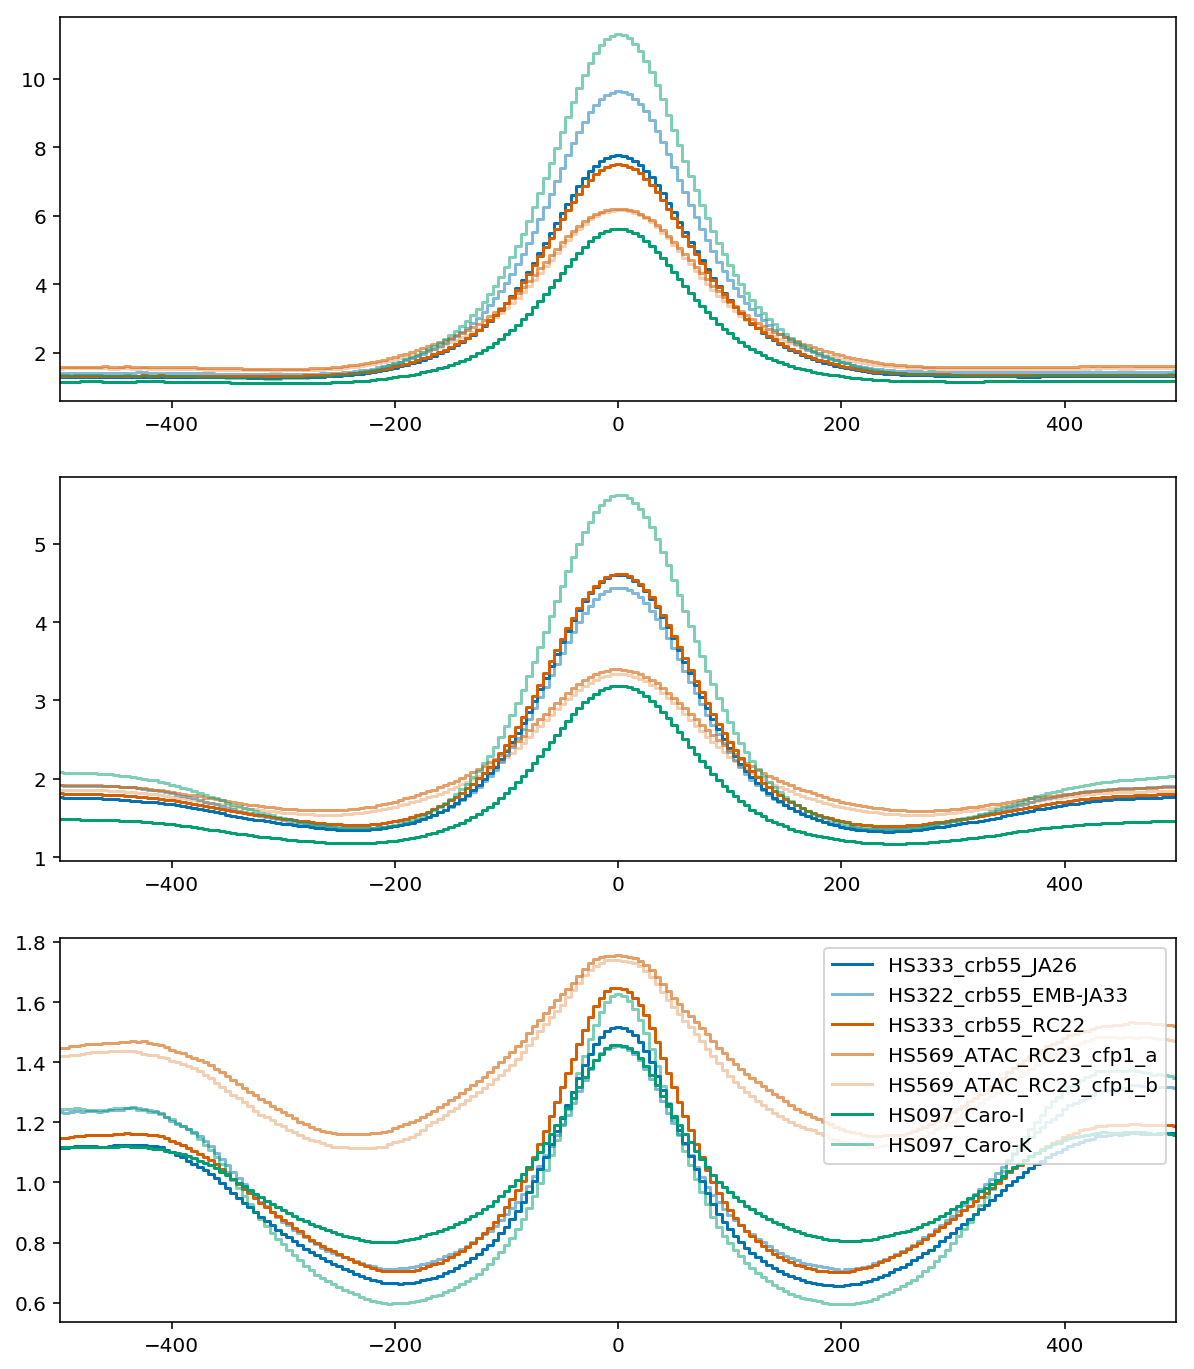

In [19]:
def plot_(gdf_):
    gdf_.t['HS333_crb55_JA26'].plot(label='HS333_crb55_JA26', color=yp.BLUE)
    gdf_.t['HS322_crb55_EMB-JA33'].plot(label='HS322_crb55_EMB-JA33', color=yp.BLUE, alpha=0.5)

    gdf_.t['HS333_crb55_RC22'].plot(label='HS333_crb55_RC22', color=yp.RED)
    gdf_.t['HS569_ATAC_RC23_cfp1_a'].plot(label='HS569_ATAC_RC23_cfp1_a', color=yp.RED, alpha=0.6)
    gdf_.t['HS569_ATAC_RC23_cfp1_b'].plot(label='HS569_ATAC_RC23_cfp1_b', color=yp.RED, alpha=0.3)

    gdf_.t['HS097_Caro-I'].plot(label='HS097_Caro-I', color=yp.GREEN)
    gdf_.t['HS097_Caro-K'].plot(label='HS097_Caro-K', color=yp.GREEN, alpha=0.5)

fig = plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plot_(gdf.query('annot == "coding_promoter"'))

plt.subplot(3,1,2)
plot_(gdf.query('annot == "putative_enhancer"'))

plt.subplot(3,1,3)
plot_(gdf.query('annot == "other_element"'))
plt.legend(loc='upper right')